In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import cv2
import PIL

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv("..\Is it cat\segmentationdata.csv")

df.shape

(2000, 8)

In [3]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
df.tail()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0
1999,100002000,0,0,25,0,68416,0,0


In [5]:
df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [7]:
df.drop("ID",axis=1,inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,2000.0,0.4570,0.498272,0.0,0.00,0.0,1.00,1.0
Marital status,2000.0,0.4965,0.500113,0.0,0.00,0.0,1.00,1.0
Age,2000.0,35.9090,11.719402,18.0,27.00,33.0,42.00,76.0
Education,2000.0,1.0380,0.599780,0.0,1.00,1.0,1.00,3.0
Income,2000.0,120954.4190,38108.824679,35832.0,97663.25,115548.5,138072.25,309364.0
Occupation,2000.0,0.8105,0.638587,0.0,0.00,1.0,1.00,2.0
Settlement size,2000.0,0.7390,0.812533,0.0,0.00,1.0,1.00,2.0


In [8]:
df["Sex"].value_counts()

0    1086
1     914
Name: Sex, dtype: int64

In [9]:
df["Marital status"].value_counts()

0    1007
1     993
Name: Marital status, dtype: int64

In [10]:
df["Education"].value_counts()

1    1386
2     291
0     287
3      36
Name: Education, dtype: int64

In [11]:
df["Occupation"].value_counts()

1    1113
0     633
2     254
Name: Occupation, dtype: int64

In [12]:
df["Settlement size"].value_counts()

0    989
1    544
2    467
Name: Settlement size, dtype: int64

In [13]:
df.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [14]:
cat_list=[]
num_list=[]


for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    if unique_values<5:
      cat_list.append(column_name)
    else:
      num_list.append(column_name)

In [15]:
cat_list

['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']

In [16]:
num_list

['Age', 'Income']

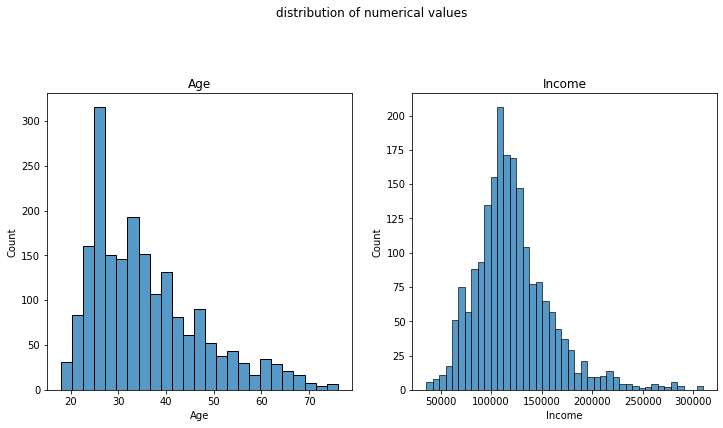

In [41]:
k=1
plt.figure(figsize=(12,12))
plt.suptitle("distribution of numerical values")

for i in df.loc[:,num_list]:
    plt.subplot(2,2,k )
    sns.histplot(df[i])
    plt.title(i)
    k+=1

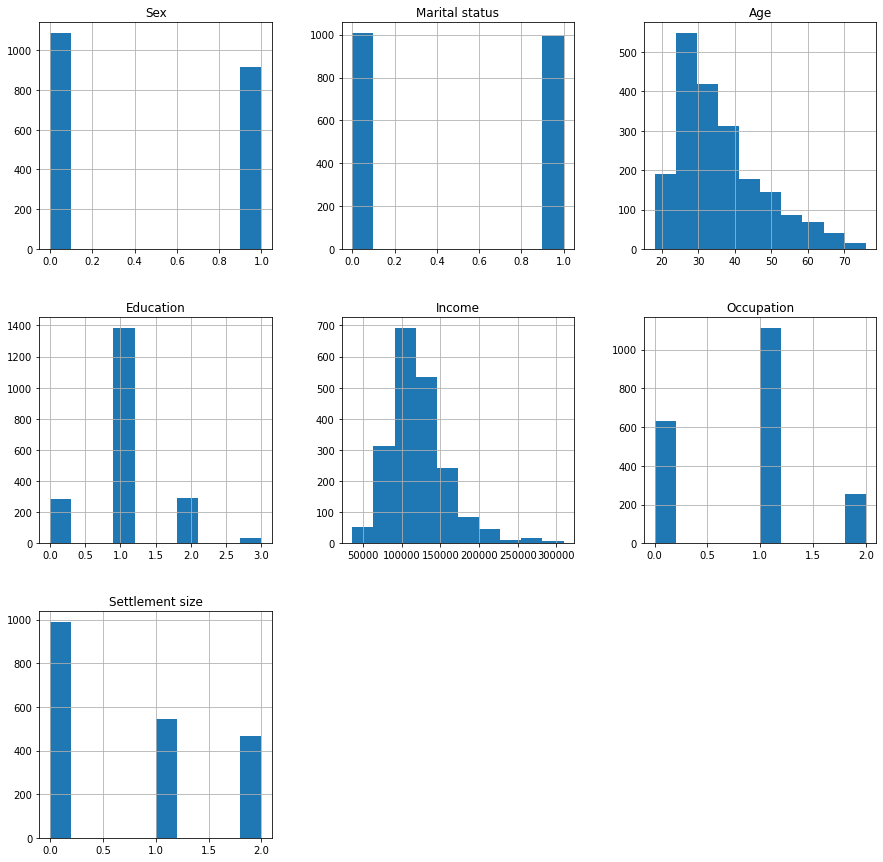

In [33]:
df.hist(figsize=(15,15));

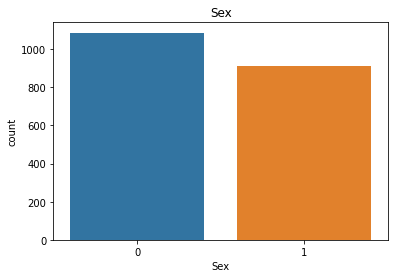

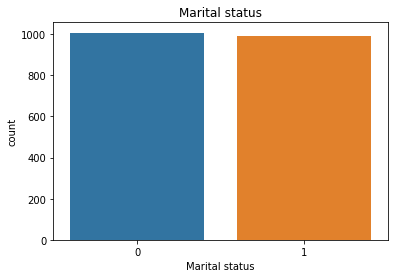

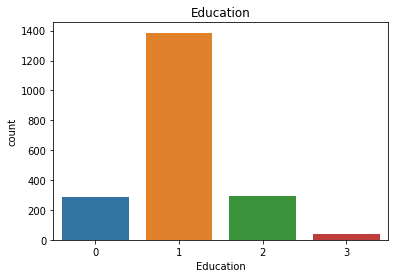

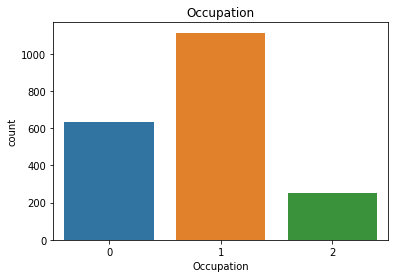

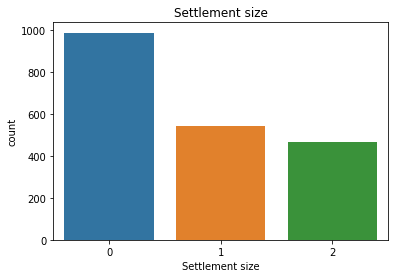

In [42]:
for i in cat_list:
    plt.figure()
    sns.countplot(x = i, data = df.loc[:,cat_list])
    plt.title(i)